In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.options.mode.copy_on_write = True

In [2]:
df = pd.read_csv('../Data/visualization_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4826 entries, 0 to 4825
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ClientID                              4826 non-null   int64  
 1   Gender                                4826 non-null   object 
 2   Age                                   4826 non-null   int64  
 3   RiskRate                              4826 non-null   object 
 4   CompletedOrdersRatio                  4826 non-null   float64
 5   CanceledOrdersRatio                   4826 non-null   float64
 6   AvgPrice                              4826 non-null   float64
 7   OrderType_Buy                         4826 non-null   float64
 8   OrderType_Sell                        4826 non-null   float64
 9   ExecutionStatus_Executed              4826 non-null   float64
 10  ExecutionStatus_NotExecuted           4826 non-null   float64
 11  ExecutionStatus_P

In [4]:
churned = df[df['Churned'] == 1]
notchurned = df[df['Churned'] == 0]

# Gender

In [5]:
gender_values = df['Gender'].unique()
churned_gender = churned['Gender'].value_counts()
notchurned_gender = notchurned['Gender'].value_counts()

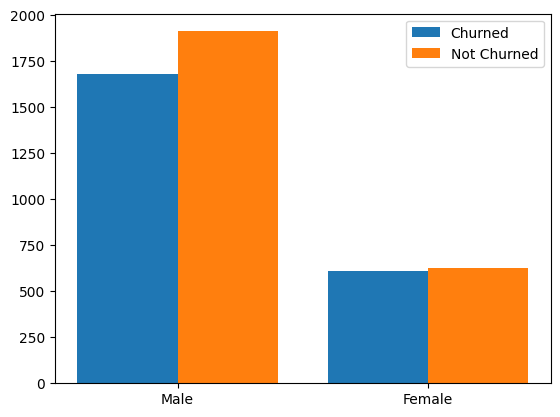

In [6]:
X_axis = np.arange(len(gender_values)) 

plt.bar(X_axis - 0.2, churned_gender, 0.4, label = 'Churned') 
plt.bar(X_axis + 0.2, notchurned_gender, 0.4, label = 'Not Churned') 

plt.legend()
plt.xticks(X_axis, gender_values) 
plt.show()

# Risk Rate

In [7]:
riskRate_values = df['RiskRate'].unique()
churned_riskRate = churned['RiskRate'].value_counts()
notchurned_riskRate = notchurned['RiskRate'].value_counts()

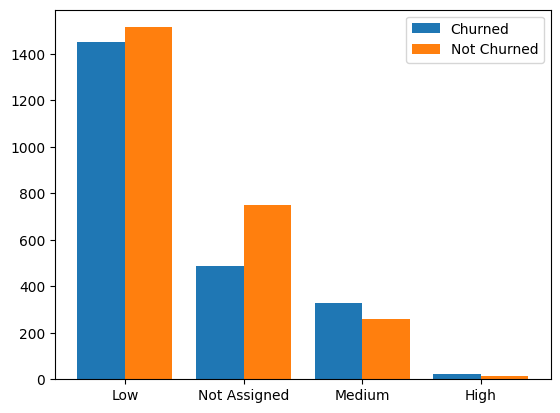

In [8]:
X_axis = np.arange(len(riskRate_values)) 

plt.bar(X_axis - 0.2, churned_riskRate, 0.4, label = 'Churned') 
plt.bar(X_axis + 0.2, notchurned_riskRate, 0.4, label = 'Not Churned') 

plt.legend()
plt.xticks(X_axis, riskRate_values) 
plt.show()

# Age

In [9]:
def getAgeBins(age):
    if(age >= 17 and age <= 20):
        return '17-20'
    elif(age >= 21 and age <= 30):
        return '21-30'
    elif(age >= 31 and age <= 40):
        return '31-40'
    elif(age >= 41 and age <= 50):
        return '41-50'
    elif(age >= 51 and age <= 60):
        return '51-60'
    elif(age >= 61 and age <= 70):
        return '61-70'
    elif(age >= 71 and age <= 80):
        return '71-80'

df['AgeBins'] = df['Age'].apply(getAgeBins)
churned['AgeBins'] = churned['Age'].apply(getAgeBins)
notchurned['AgeBins'] = notchurned['Age'].apply(getAgeBins)

In [10]:
churned_AgeBins = churned['AgeBins'].value_counts().sort_index()
notchurned_AgeBins = notchurned['AgeBins'].value_counts().sort_index()
AgeBins_values = churned_AgeBins.index

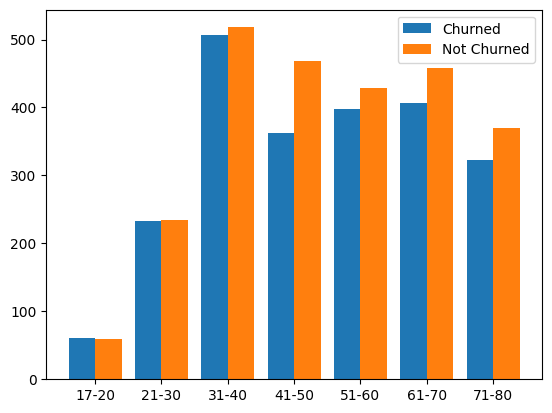

In [11]:
X_axis = np.arange(len(AgeBins_values)) 

plt.bar(X_axis - 0.2, churned_AgeBins, 0.4, label = 'Churned') 
plt.bar(X_axis + 0.2, notchurned_AgeBins, 0.4, label = 'Not Churned') 

plt.legend()
plt.xticks(X_axis, AgeBins_values) 
plt.show()

In [12]:
def getGenerations(age):
    if(age >= 60):
        return 'Baby Boomer'
    elif(age >= 44 and age <= 59):
        return 'Gen X'
    elif(age >= 28 and age <= 43):
        return 'Mellenial'
    elif(age >= 12 and age <= 27):
        return 'Gen Z'

df['Generation'] = df['Age'].apply(getGenerations)
churned['Generation'] = churned['Age'].apply(getGenerations)
notchurned['Generation'] = notchurned['Age'].apply(getGenerations)

In [13]:
churned_Generation = churned['Generation'].value_counts().sort_index()
notchurned_Generation = notchurned['Generation'].value_counts().sort_index()
Generation_values = churned_Generation.index

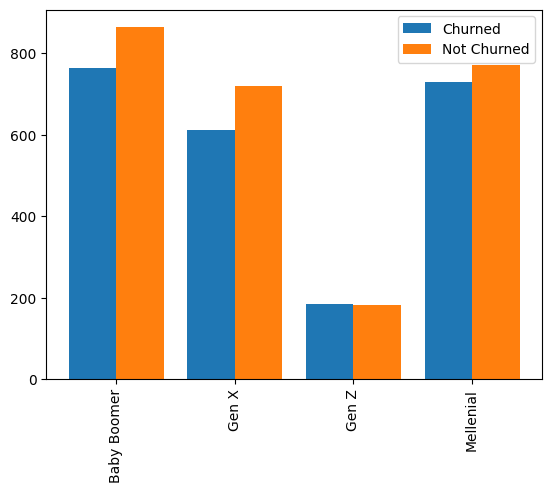

In [14]:
X_axis = np.arange(len(Generation_values)) 

plt.bar(X_axis - 0.2, churned_Generation, 0.4, label = 'Churned') 
plt.bar(X_axis + 0.2, notchurned_Generation, 0.4, label = 'Not Churned') 

plt.legend()
plt.xticks(X_axis, Generation_values) 
plt.xticks(rotation=90)
plt.show()

# Sectors

In [15]:
sectors = [
    "SectorName_RealEstate",
    "SectorName_Financials",
    "SectorName_Materials",
    "SectorName_ConsumerDiscretionary",
    "SectorName_Industries",
    "SectorName_HealthCare",
    "SectorName_InformationTechnology",
    "SectorName_ConsumerStaples",
    "SectorName_INDUSTRIAL",
    "SectorName_SERVICES",
    "SectorName_Energy",
    "SectorName_BasicMaterials",
    "SectorName_INVESTMENT",
    "SectorName_TelecommunicationServices",
    "SectorName_REALESTATE",
    "SectorName_Telecommunications",
    "SectorName_FOOD",
    "SectorName_Others",
    "SectorName_Tourism",
    "SectorName_ConsumerServices",
    "SectorName_Utilities",
    "SectorName_PharmaceuticalIndustries",
 ]

sector_values = [
    "RealEstate",
    "Financials",
    "Materials",
    "ConsumerDiscretionary",
    "Industries",
    "HealthCare",
    "InformationTechnology",
    "ConsumerStaples",
    "INDUSTRIAL",
    "SERVICES",
    "Energy",
    "BasicMaterials",
    "INVESTMENT",
    "TelecommunicationServices",
    "REALESTATE",
    "Telecommunications",
    "FOOD",
    "Others",
    "Tourism",
    "ConsumerServices",
    "Utilities",
    "PharmaceuticalIndustries",
 ]


In [16]:
churned_sectors = []
for sector in sectors:
    churned_sectors.append(churned[sector].sum())

notchurned_sectors = []
for sector in sectors:
    notchurned_sectors.append(notchurned[sector].sum())


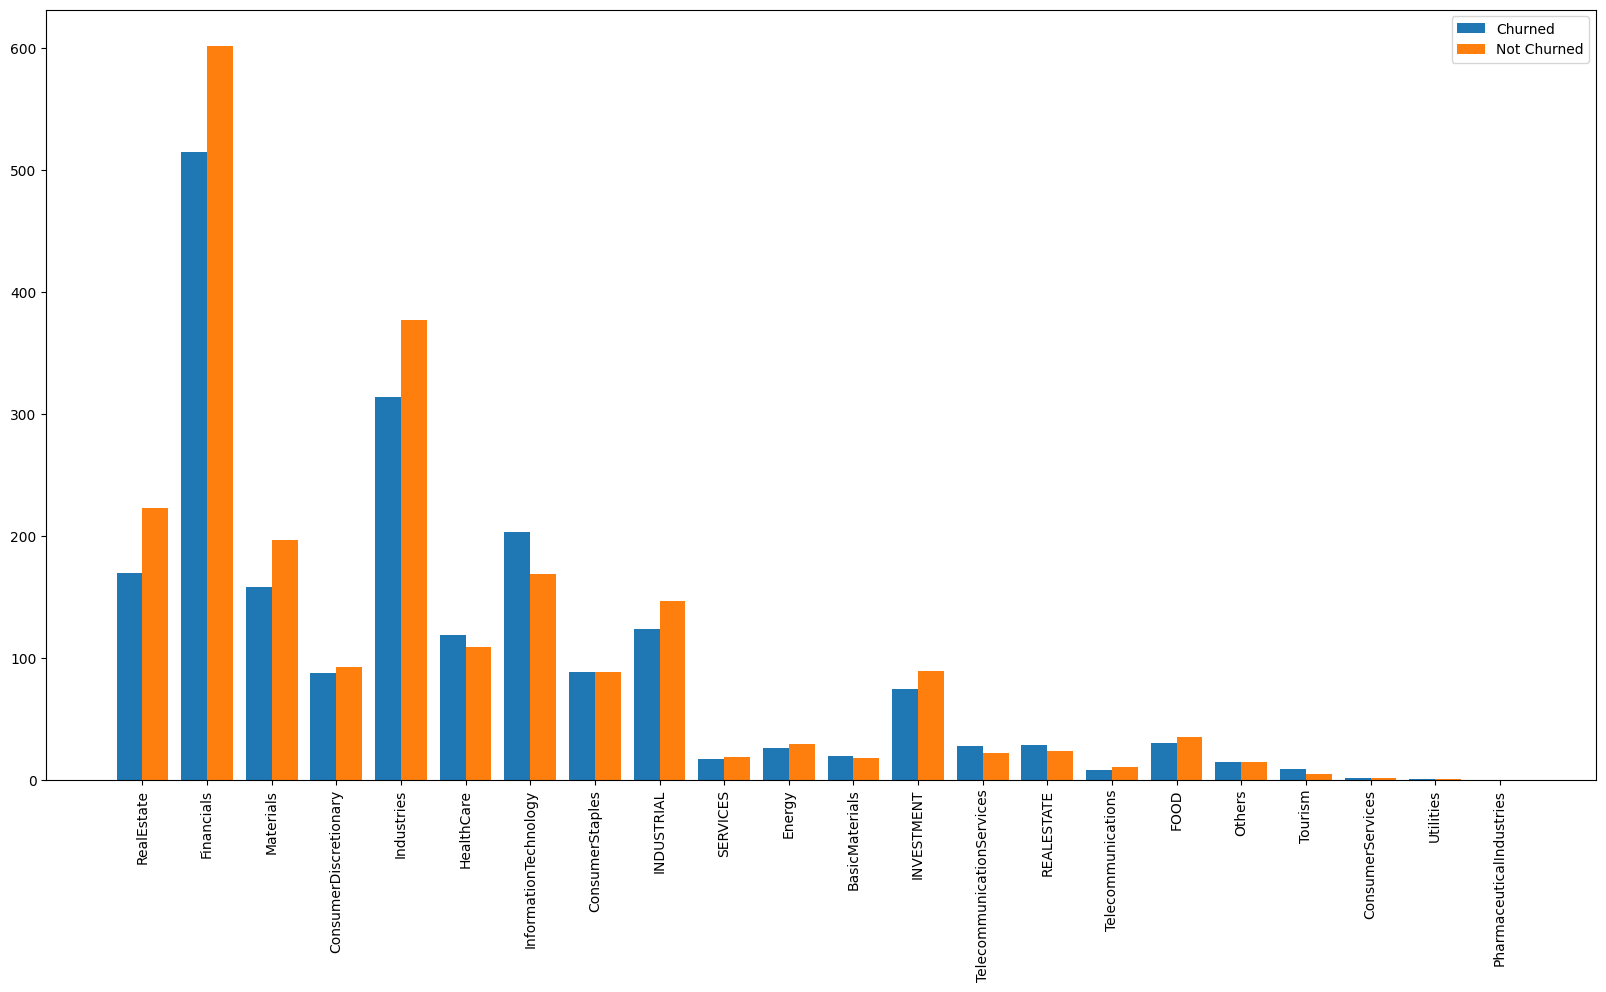

In [17]:
X_axis = np.arange(len(sector_values)) 

plt.figure(figsize=(20, 10))

plt.bar(X_axis - 0.2, churned_sectors, 0.4, label = 'Churned') 
plt.bar(X_axis + 0.2, notchurned_sectors, 0.4, label = 'Not Churned') 

plt.legend()
plt.xticks(X_axis, sector_values) 
plt.xticks(rotation=90)
plt.show()

# Order Type

In [18]:
orderTypes = [
    "OrderType_Buy", 
    "OrderType_Sell"
 ]

orderType_values = [
    "Buy",
    "Sell"
 ]


In [19]:
churned_orderTypes = []
for orderType in orderTypes:
    churned_orderTypes.append(churned[orderType].sum())

notchurned_orderTypes = []
for orderType in orderTypes:
    notchurned_orderTypes.append(notchurned[orderType].sum())


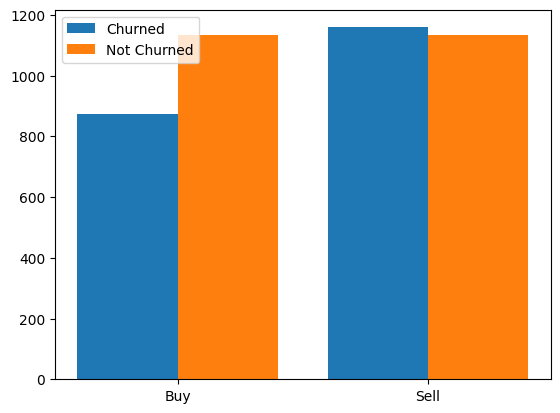

In [20]:
X_axis = np.arange(len(orderType_values)) 

plt.bar(X_axis - 0.2, churned_orderTypes, 0.4, label = 'Churned') 
plt.bar(X_axis + 0.2, notchurned_orderTypes, 0.4, label = 'Not Churned') 

plt.legend()
plt.xticks(X_axis, orderType_values) 
plt.show()

# Execution Status

In [21]:
ExecutionStatus = [
    "ExecutionStatus_Executed",  
    "ExecutionStatus_NotExecuted",   
    "ExecutionStatus_PartiallyExecuted"
 ]

ExecutionStatus_values = [
    "Executed",  
    "Not Executed",   
    "Partially Executed"
 ]


In [22]:
churned_ExecutionStatus = []
for status in ExecutionStatus:
    churned_ExecutionStatus.append(churned[status].sum())

notchurned_ExecutionStatus = []
for status in ExecutionStatus:
    notchurned_ExecutionStatus.append(notchurned[status].sum())


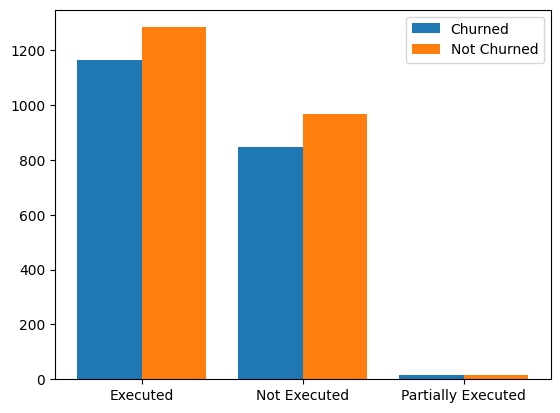

In [23]:
X_axis = np.arange(len(ExecutionStatus_values)) 

plt.bar(X_axis - 0.2, churned_ExecutionStatus, 0.4, label = 'Churned') 
plt.bar(X_axis + 0.2, notchurned_ExecutionStatus, 0.4, label = 'Not Churned') 

plt.legend()
plt.xticks(X_axis, ExecutionStatus_values) 
plt.show()

# 